# Regression and Gauss-Markov assumptions

For this experiment , we use `statsmodels`.
```bash
! pip install statsmodels
```

## Imports and data loading

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [36]:
data = pd.read_excel("/content/drive/MyDrive/RegressionDiagnostics/Suction_vsCP-modified_1.xlsx")
data.head(10)

,Suction (kPa),Silica fume (%),Lime (%),Gypsum content (%),Applied vertical stress (kPa),Degree of Saturation (%),Collapse Potential (%)
0,5,0,0,15,200.0,50.0,1.50
1,10,0,0,15,200.0,40.0,1.40
2,16,0,0,15,200.0,42.8,1.36
3,25,0,0,15,200.0,45.0,1.30
4,32,0,0,15,200.0,53.5,1.47
5,50,0,0,15,200.0,44.6,2.20
6,63,0,0,15,200.0,34.0,2.53
7,80,0,0,15,200.0,31.4,2.94
8,100,0,0,15,200.0,30.0,3.30
9,160,0,0,15,200.0,25.8,4.20


In [37]:
# Define the mapping
original_columns = list(data.columns)
new_columns = {}

# Loop through and rename all except the target column
x_counter = 1
for col in original_columns:
    if col.strip().lower() == "collapse potential (%)":
        new_columns[col] = "Y"
    else:
        new_columns[col] = f"X{x_counter}"
        x_counter += 1

# Rename the columns
data.rename(columns=new_columns, inplace=True)

# Display the renamed columns and first few rows
print(data.columns)
print(data.head())

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'], dtype='object')
   X1  X2  X3  X4     X5    X6     Y
0   5   0   0  15  200.0  50.0  1.50
1  10   0   0  15  200.0  40.0  1.40
2  16   0   0  15  200.0  42.8  1.36
3  25   0   0  15  200.0  45.0  1.30
4  32   0   0  15  200.0  53.5  1.47


## a)

We start by using the simple linear regression model
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3+ \beta_4 X_4 + \beta_5 X_5 + \beta_6 X_6
$$

Using [``sm.OLS``](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html), To compute optimal values for the parameters.

> Note: We use ``sm.add_constant`` to add values for the intercept.



In [38]:
# Prepare input data
X = sm.add_constant(data[["X1", "X2", "X3","X4","X5","X6"]])
y = data["Y"]

In [39]:
X[:3]

,const,X1,X2,X3,X4,X5,X6
0,1.0,5,0,0,15,200.0,50.0
1,1.0,10,0,0,15,200.0,40.0
2,1.0,16,0,0,15,200.0,42.8


In [40]:
X.shape

(600, 7)

In [41]:
y[:3]

,Y
0,1.50
1,1.40
2,1.36


In [42]:
y.shape

(600,)

In [43]:
# Fit a linear model with statsmodels
model   = sm.OLS(y, X)
results = model.fit()

In [44]:
model.__dict__

{'weights': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 

In [45]:
# Show the results using the summary() function
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     115.4
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           3.07e-96
Time:                        14:28:45   Log-Likelihood:                -2188.8
No. Observations:                 600   AIC:                             4392.
Df Residuals:                     593   BIC:                             4422.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.9050      2.253     19.490      0.0

Use the model to predict the $y$-values

In [46]:
predicted_values = model.predict(results.params, X)

In [47]:
predicted_values[:2]

array([3.08109367, 3.69459264])

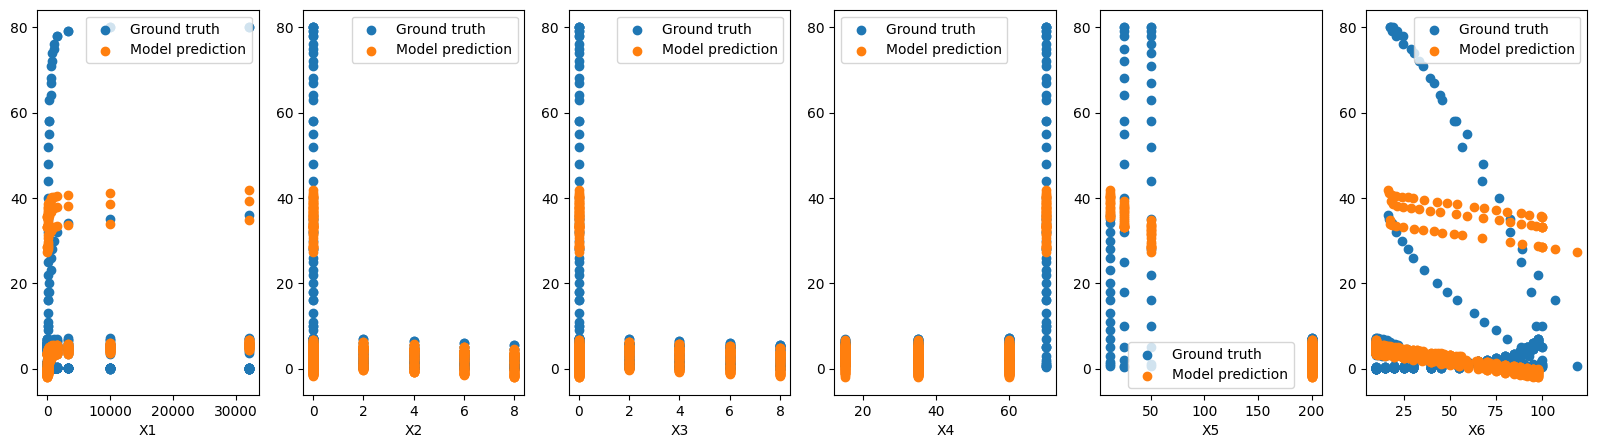

In [51]:
# Visualization of the predicted variables vs. the true variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for ax, variable_name in zip(axs, ["X1", "X2", "X3","X4","X5","X6"]):
    ax.scatter(data[variable_name], data["Y"], label="Ground truth")
    ax.scatter(data[variable_name], predicted_values, label="Model prediction")
    ax.legend()
    ax.set_xlabel(variable_name)

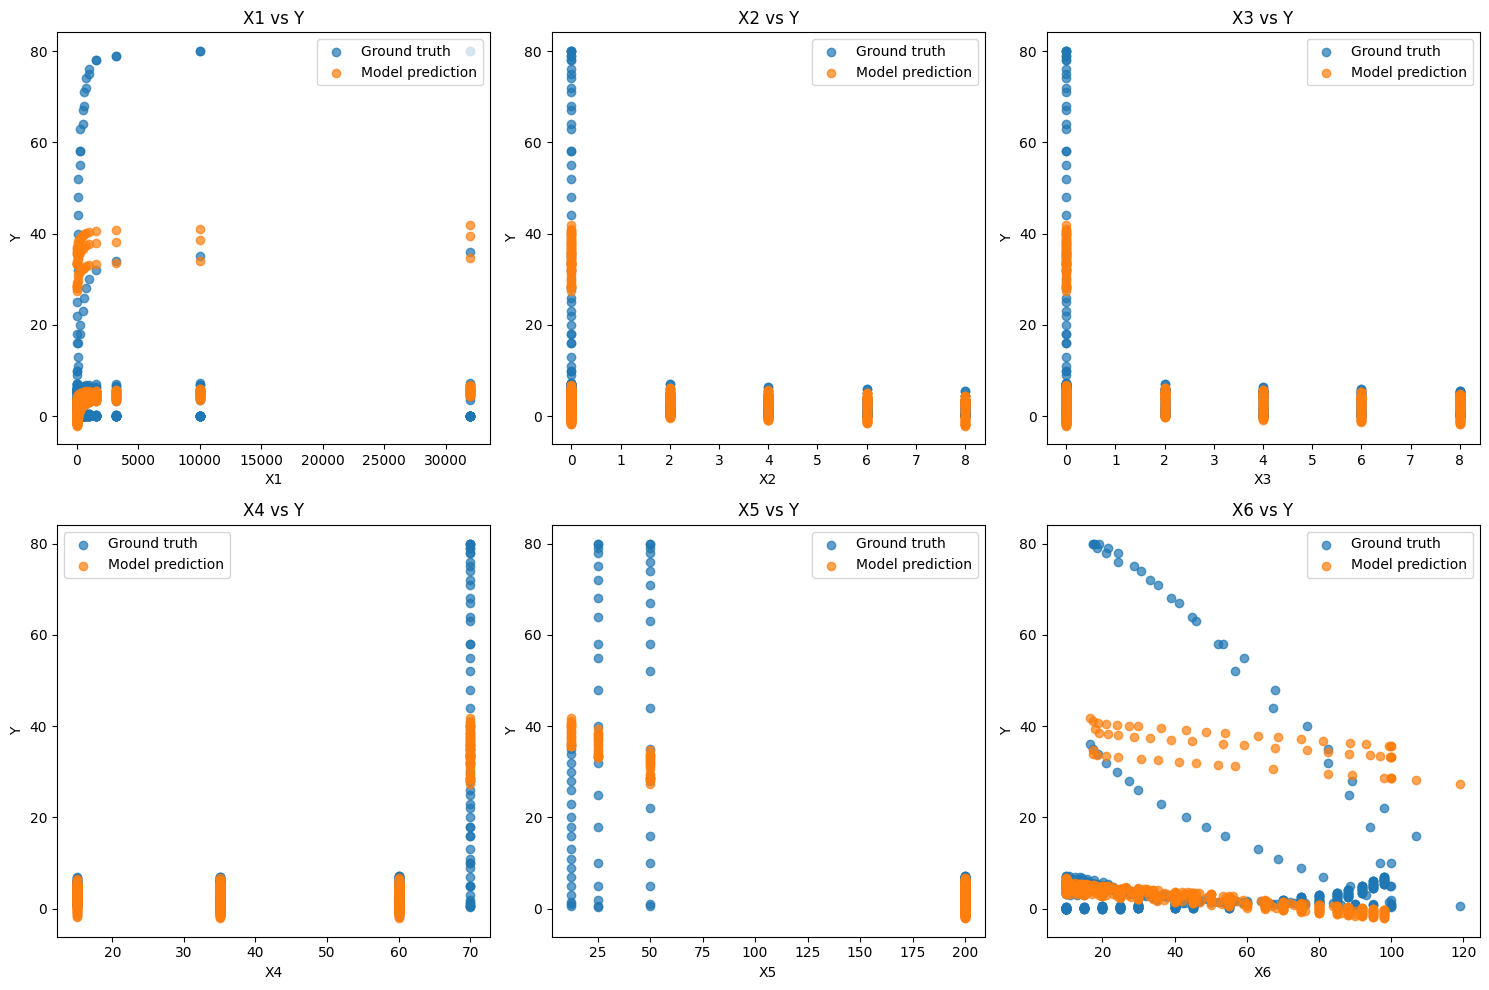

In [49]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()  # Flatten to easily iterate over

# List of feature names
features = ["X1", "X2", "X3", "X4", "X5", "X6"]

# Plot for each feature
for ax, feature in zip(axs, features):
    ax.scatter(data[feature], data["Y"], label="Ground truth", alpha=0.7)
    ax.scatter(data[feature], predicted_values, label="Model prediction", alpha=0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel("Y")
    ax.set_title(f"{feature} vs Y")
    ax.legend()

plt.tight_layout()
plt.show()

## b)

Compute the residuals $e = \hat{y} - y$ of the resulting model.

In [52]:
residuals = data["Y"] - predicted_values
# alternatively: residuals = results.resid

In [53]:
residuals[:4]

,Y
0,-1.581094
1,-2.294593
2,-2.163065
3,-2.088438


Plot the residuals over the input variables $x_1$ and $x_2$. What do you observe?

In [ ]:
plt.figure()
plt.scatter(data["X1"], residuals)
plt.figure()
plt.scatter(data["X2"], residuals)
plt.figure()
plt.scatter(data["X3"], residuals)
plt.figure()
plt.scatter(data["X4"], residuals)
plt.figure()
plt.scatter(data["X5"], residuals)
plt.figure()
plt.scatter(data["X6"], residuals)

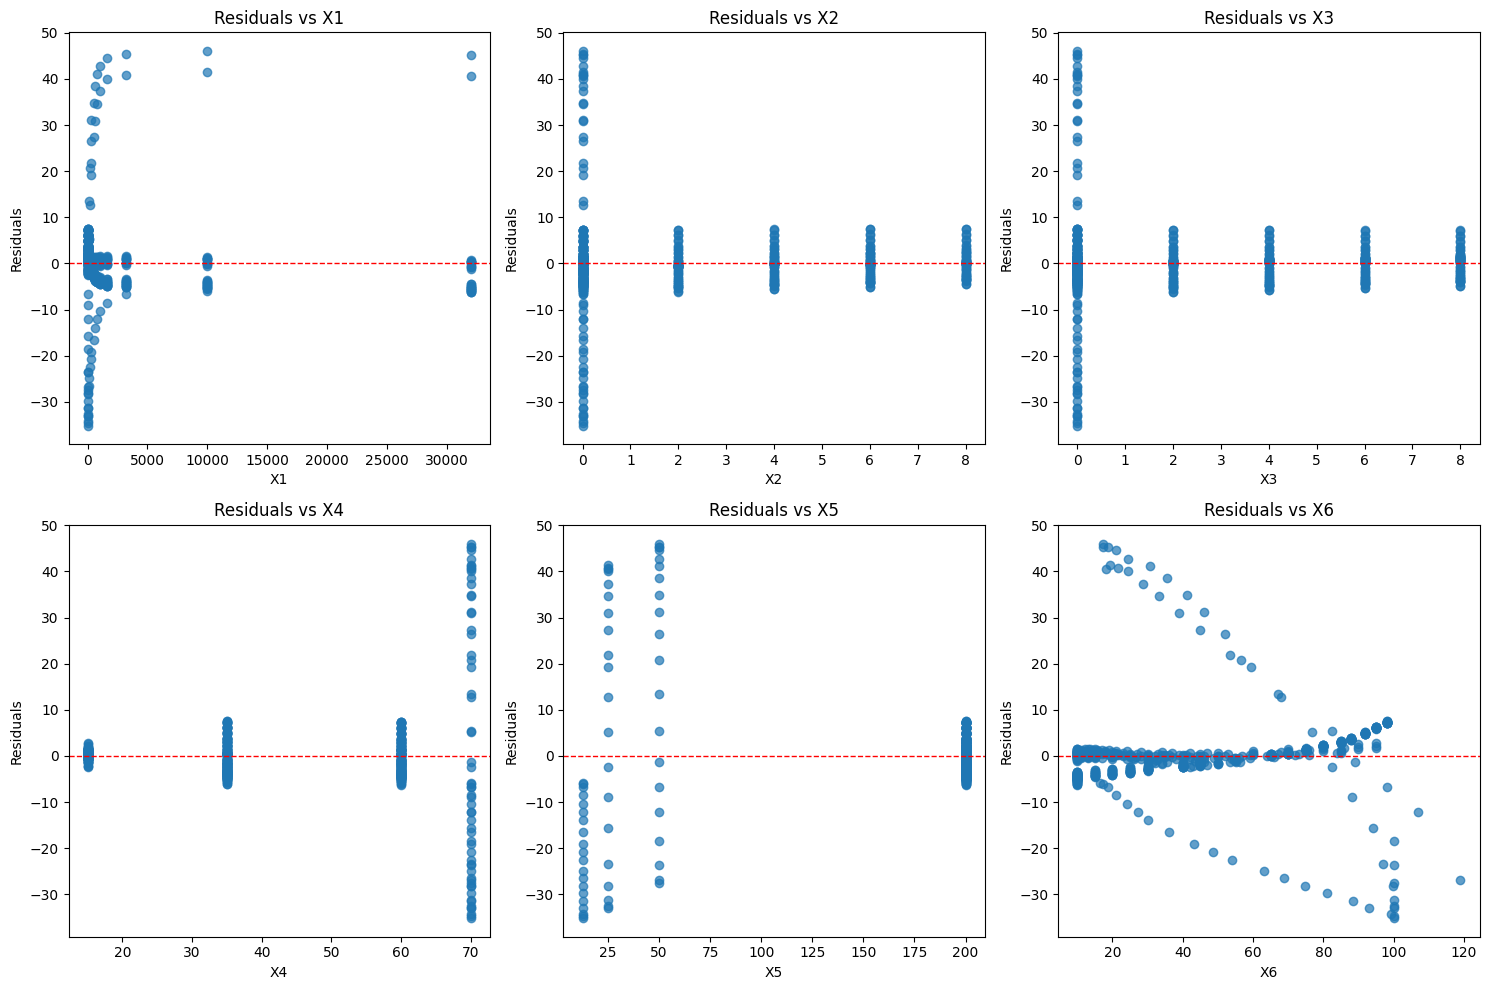

In [54]:
# Residual plot layout
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

# Feature names
features = ["X1", "X2", "X3", "X4", "X5", "X6"]

# Plot residuals vs each input variable
for ax, feature in zip(axs, features):
    ax.scatter(data[feature], residuals, alpha=0.7)
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
    ax.set_xlabel(feature)
    ax.set_ylabel("Residuals")
    ax.set_title(f"Residuals vs {feature}")

plt.tight_layout()
plt.show()

Using a White test ([`statsmodels.stats.diagnostic.het_white`](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_white.html)), show that we can reject the hypothesis of homoscedastic residuals at an $\alpha$ level of 0.01.

In [55]:
from statsmodels.stats.diagnostic import het_white

statistic, p_value, _, _ = het_white(residuals, X)
print(f"Value of the null-hypothesis that the residuals are homoscedastic: {statistic}")
print(f"p-value of the statistic: {p_value}")

Value of the null-hypothesis that the residuals are homoscedastic: 416.7940917385054
p-value of the statistic: 6.158648728052616e-74


## c)

Consider the alternative model
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4  + \beta_5 X_5 +  \beta_6 X_6 + \beta_4 X_1^2
$$

Compute the optimal parameter values. You should observe that the $R^2$ value improves drastically over the previous model.

In [56]:
# Prepare input data
X = sm.add_constant(data[["X1", "X2", "X3","X4","X5","X6"]])
X["X1^2"] = np.square(X["X1"])
y = data["Y"]

# Fit a linear model
model   = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     98.88
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           2.85e-95
Time:                        14:39:51   Log-Likelihood:                -2188.6
No. Observations:                 600   AIC:                             4393.
Df Residuals:                     592   BIC:                             4428.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6000      2.307     18.897      0.0

In [57]:
X[:10]

,const,X1,X2,X3,X4,X5,X6,X1^2
0,1.0,5,0,0,15,200.0,50.0,25
1,1.0,10,0,0,15,200.0,40.0,100
2,1.0,16,0,0,15,200.0,42.8,256
3,1.0,25,0,0,15,200.0,45.0,625
4,1.0,32,0,0,15,200.0,53.5,1024
5,1.0,50,0,0,15,200.0,44.6,2500
6,1.0,63,0,0,15,200.0,34.0,3969
7,1.0,80,0,0,15,200.0,31.4,6400
8,1.0,100,0,0,15,200.0,30.0,10000
9,1.0,160,0,0,15,200.0,25.8,25600


Although this model gives a very good fit of the data, there is another problem.
Use the Variance inflation factor ([`statsmodels.stats.outliers_influence.variance_inflation_factor`](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)) to check whether the variables are dependent.

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for index, variable_name in enumerate(X.columns):
    if variable_name == "const":
        continue
    print(f"VIF for variable {variable_name} is {vif(X, index)}")

VIF for variable X1 is 28.546247383042502
VIF for variable X2 is 1.6444195373610575
VIF for variable X3 is 1.6378112566584384
VIF for variable X4 is 1.3975384509303503
VIF for variable X5 is 1.624100589131753
VIF for variable X6 is 1.6202901894010242
VIF for variable X1^2 is 26.334876650905336


In [59]:
# Bonus: Check if residuals are now homoscedastic
from statsmodels.stats.diagnostic import het_white
original_X_for_white_test = sm.add_constant(data[["X1", "X2", "X3","X4","X5","X6"]])


statistic, p_value, _, _ = het_white(results.resid, original_X_for_white_test)
print(f"Value of the null-hypothesis that the residuals are homoscedastic: {statistic}")
print(f"p-value of the statistic: {p_value}")

# statistic, p_value, _, _ = het_white(results.resid, X)
# print(f"Value of the null-hypothesis that the residuals are homoscedastic: {statistic}")
# print(f"p-value of the statistic: {p_value}")

Value of the null-hypothesis that the residuals are homoscedastic: 417.80625323314695
p-value of the statistic: 3.808049899495773e-74


## d)
Consider a third model:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_4 X_4 + \beta_5 X_5 + \beta_6 X_6 + \beta_3 X_1^2
$$

Compute the optimal parameter values.

In [60]:
# Prepare input data
X = sm.add_constant(data[["X1", "X2","X3", "X4","X5", "X6"]])
X["X1^2"] = np.square(X["X1"])
y = data["Y"]

# Fit a linear model
model   = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     98.88
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           2.85e-95
Time:                        14:44:55   Log-Likelihood:                -2188.6
No. Observations:                 600   AIC:                             4393.
Df Residuals:                     592   BIC:                             4428.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6000      2.307     18.897      0.0

In [61]:
X['X1'][0] ,X["X1^2"][0]

(np.int64(5), np.int64(25))

Check if the model has multicollinear input variables using the VIF.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for index, variable_name in enumerate(X.columns):
    if variable_name == "const":
        continue
    print(f"VIF for variable {variable_name} is {vif(X, index)}")

VIF for variable X1 is 28.546247383042502
VIF for variable X2 is 1.6444195373610575
VIF for variable X3 is 1.6378112566584384
VIF for variable X4 is 1.3975384509303503
VIF for variable X5 is 1.624100589131753
VIF for variable X6 is 1.6202901894010242
VIF for variable X1^2 is 26.334876650905336


Check if the model satisfies the homoscedasticity assumption using the White test and an $\alpha$ level of 0.01.

In [ ]:
from statsmodels.stats.diagnostic import het_white
# Create the exogenous variables for the White test using the original untransformed variables
X_for_white_test = sm.add_constant(data[["X1", "X2"]])

statistic, p_value, _, _ = het_white(results.resid, X_for_white_test)
print(f"Value of the null-hypothesis that the residuals are homoscedastic: {statistic}")
print(f"p-value of the statistic: {p_value}")

Value of the null-hypothesis that the residuals are homoscedastic: 28.595081384850673
p-value of the statistic: 2.7837798885351746e-05


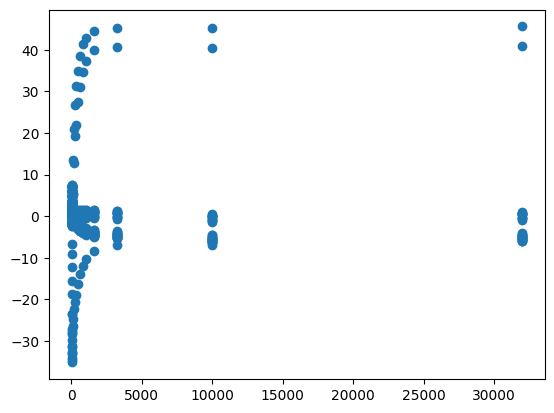

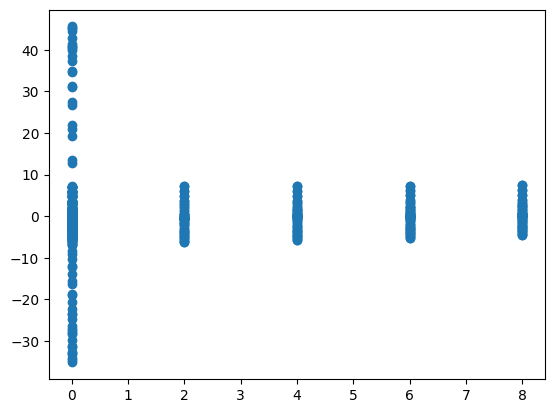

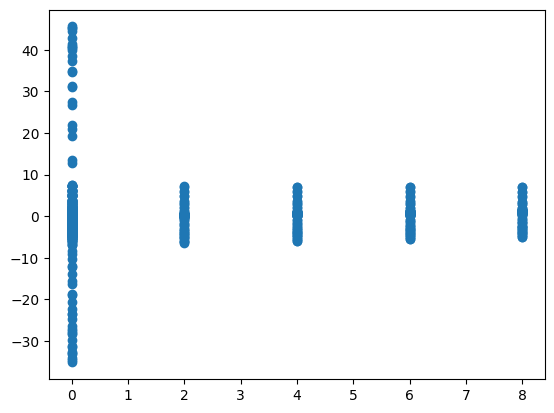

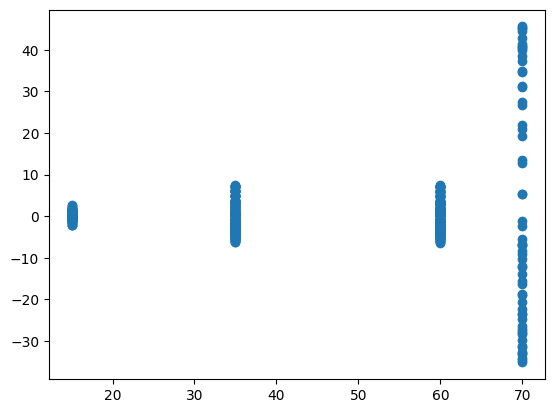

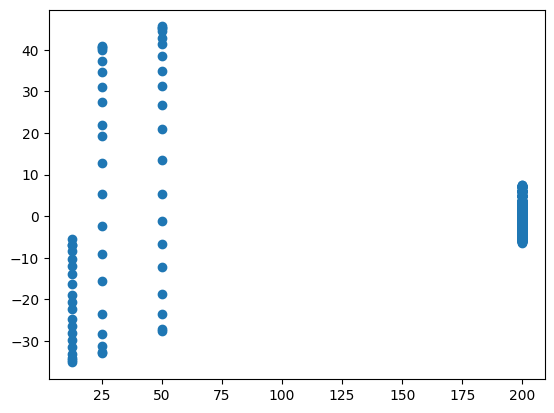

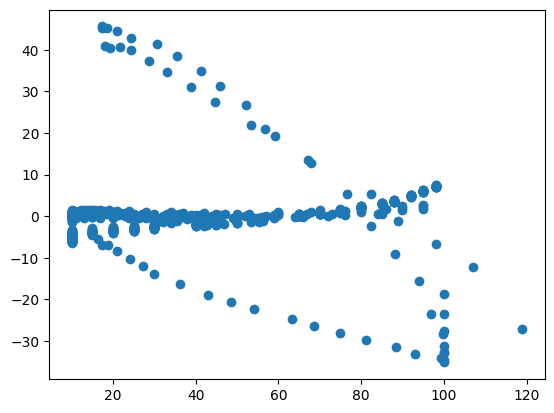

In [64]:
# Bonus: Visualization of the residuals
plt.figure()
plt.scatter(data["X1"], results.resid)
plt.figure()
plt.scatter(data["X2"], results.resid)
plt.figure()
plt.scatter(data["X3"], results.resid)
plt.figure()
plt.scatter(data["X4"], results.resid)
plt.figure()
plt.scatter(data["X5"], results.resid)
plt.figure()
plt.scatter(data["X6"], results.resid)

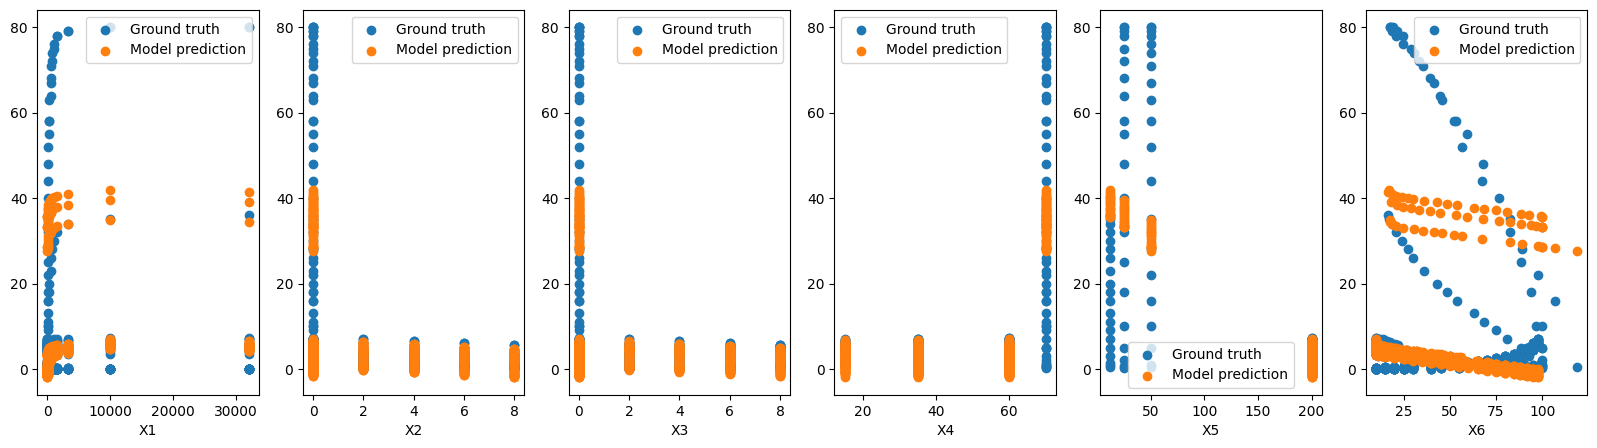

In [65]:
# Visualization of the predicted variables vs. the true variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for ax, variable_name in zip(axs, ["X1", "X2", "X3","X4", "X5", "X6"]):
    ax.scatter(data[variable_name], data["Y"], label="Ground truth")
    ax.scatter(data[variable_name], model.predict(results.params, X), label="Model prediction")
    ax.legend()
    ax.set_xlabel(variable_name)

# Regression Pipeline:

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_excel("/content/drive/MyDrive/RegressionDiagnostics/Suction_vsCP-modified_1.xlsx")

# Rename columns for regression
data.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']

# Add polynomial term manually
data['X1_squared'] = data['X1']**2

# Define predictors and target
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X1_squared']]
y = data['Y']

# Add intercept for statsmodels
X_sm = sm.add_constant(X)

In [67]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

def remove_high_vif_features(X, threshold=10.0):
    while True:
        vif_df = calculate_vif(X)
        max_vif = vif_df['VIF'].max()
        if max_vif > threshold:
            drop_feat = vif_df.sort_values('VIF', ascending=False).iloc[0]['feature']
            print(f"Dropping {drop_feat} due to VIF = {max_vif:.2f}")
            X = X.drop(columns=[drop_feat])
        else:
            break
    return X

# Remove features with VIF > 10
X_noconst = X_sm.drop(columns=['const'])  # exclude intercept before VIF
X_reduced = remove_high_vif_features(X_noconst)

# Add intercept back
X_reduced = sm.add_constant(X_reduced)

Dropping X1 due to VIF = 30.32


In [68]:
ols_model = sm.OLS(y, X_reduced)
robust_result = ols_model.fit(cov_type='HC3')  # Robust to heteroscedasticity
print(robust_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     28.10
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           1.38e-25
Time:                        14:51:39   Log-Likelihood:                -2188.9
No. Observations:                 600   AIC:                             4392.
Df Residuals:                     593   BIC:                             4423.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.0032      4.317     10.192      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [69]:
# Use reduced set of features from VIF filtering (without intercept)
X_ml = X_reduced.drop(columns='const')
X_train, X_test, y_train, y_test = train_test_split(X_ml, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = LassoCV(alphas=np.logspace(-3, 1, 100), cv=5, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluation
def eval_model(name, y_true, y_pred):
    print(f"---- {name} ----")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²:", r2_score(y_true, y_pred))
    print()

eval_model("Ridge", y_test, y_pred_ridge)
eval_model("Lasso", y_test, y_pred_lasso)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.17109e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.85142e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.60732e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.97016e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

---- Ridge ----
RMSE: 10.164281625060218
R²: 0.5726010012841461

---- Lasso ----
RMSE: 10.15311580820467
R²: 0.57353951083625



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.09692e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.10705e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.10578e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


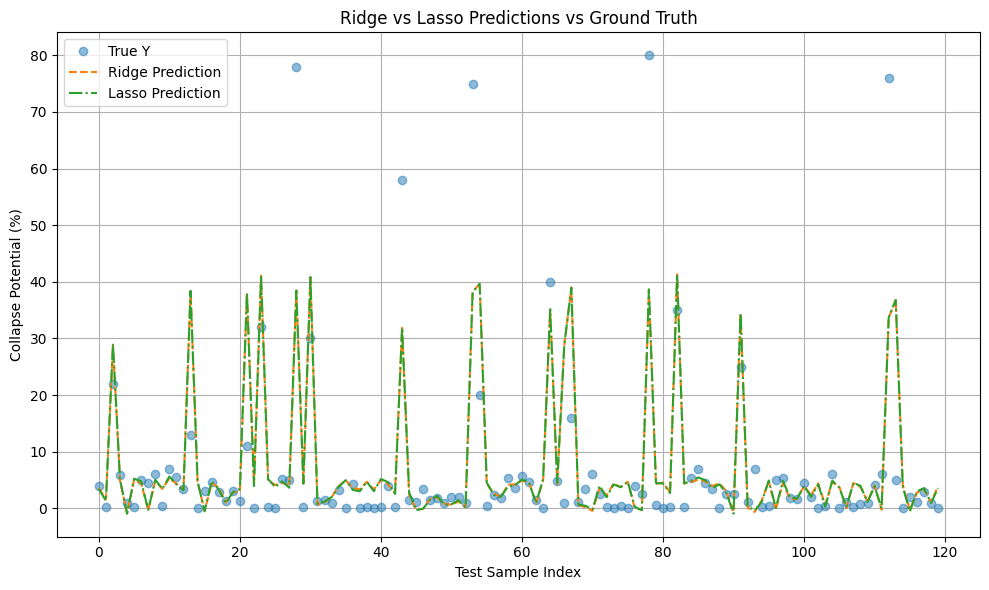

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Y', marker='o', linestyle='', alpha=0.5)
plt.plot(y_pred_ridge, label='Ridge Prediction', linestyle='--')
plt.plot(y_pred_lasso, label='Lasso Prediction', linestyle='-.')
plt.title("Ridge vs Lasso Predictions vs Ground Truth")
plt.xlabel("Test Sample Index")
plt.ylabel("Collapse Potential (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

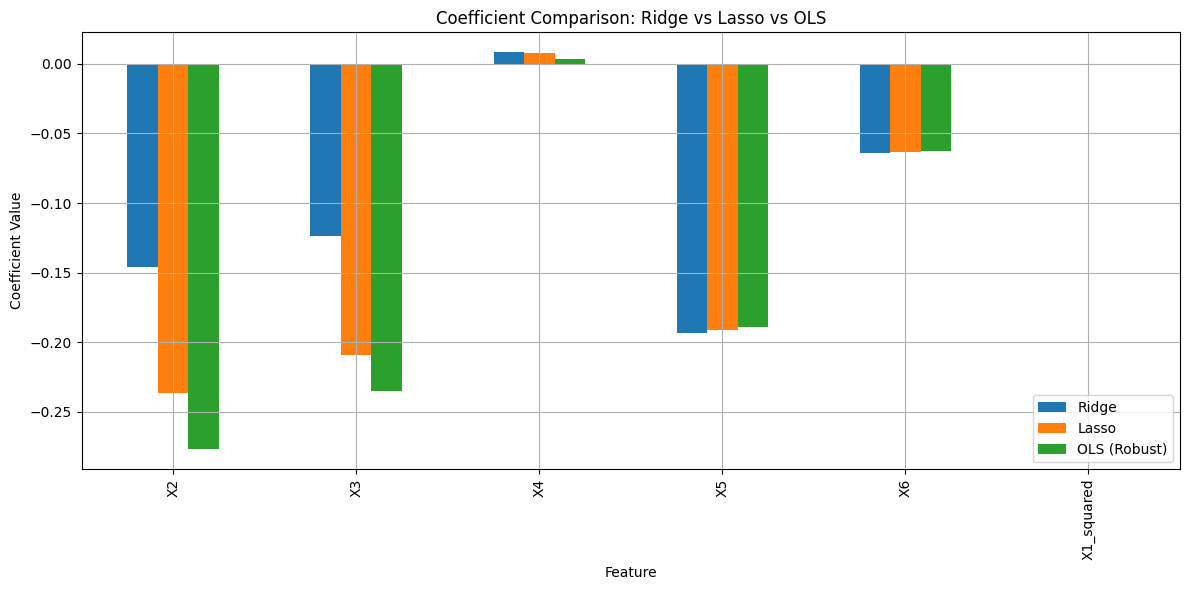

In [71]:
coef_df = pd.DataFrame({
    'Feature': X_ml.columns,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
})

# Add OLS robust model coefficients
coef_df['OLS (Robust)'] = robust_result.params[X_ml.columns].values

# Plotting
coef_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title("Coefficient Comparison: Ridge vs Lasso vs OLS")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3-

Dropping 'X1' with VIF = 30.32
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     23.45
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           6.53e-25
Time:                        15:08:30   Log-Likelihood:                -2188.9
No. Observations:                 600   AIC:                             4392.
Df Residuals:                     593   BIC:                             4423.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5092

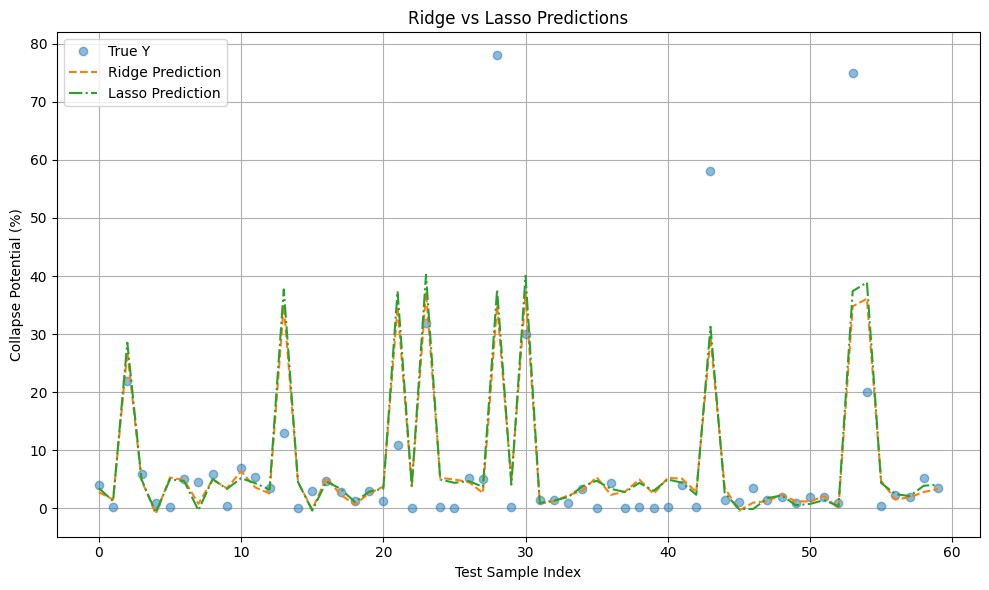

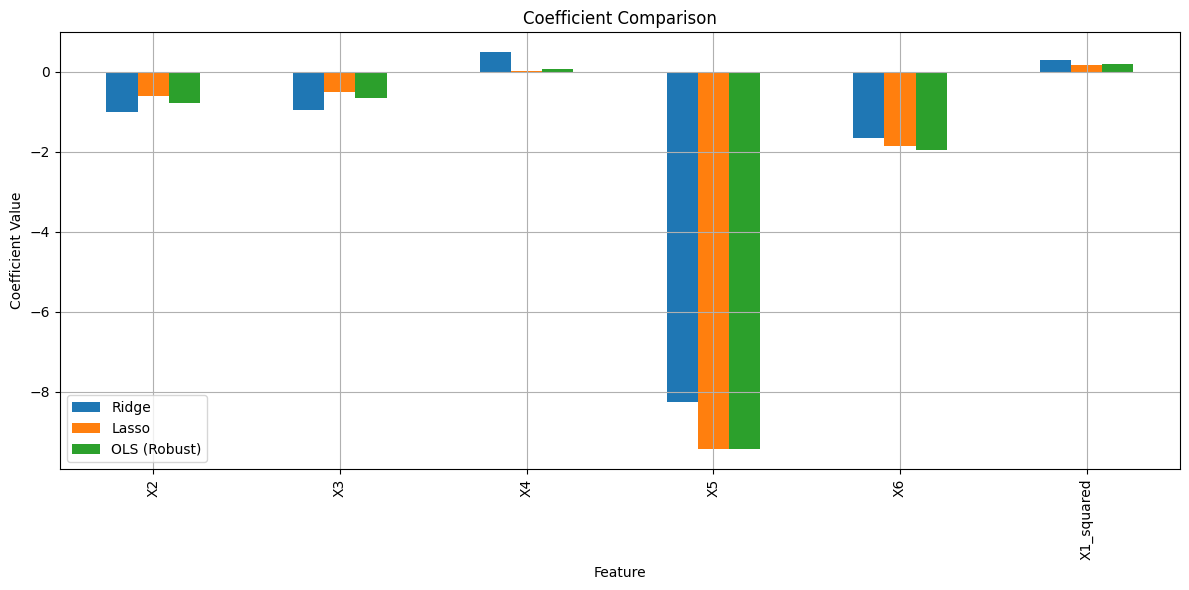

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Load Data ===
data = pd.read_excel("/content/drive/MyDrive/RegressionDiagnostics/Suction_vsCP-modified_1.xlsx")
data.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
data['X1_squared'] = data['X1'] ** 2

X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X1_squared']]
y = data['Y']

# === VIF Filtering Function ===
def calculate_vif(X_df):
    vif = pd.DataFrame()
    vif["feature"] = X_df.columns
    vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    return vif

def remove_high_vif_features(X_df, threshold=10.0):
    while True:
        vif_df = calculate_vif(X_df)
        max_vif = vif_df['VIF'].max()
        if max_vif > threshold:
            drop_feat = vif_df.sort_values('VIF', ascending=False).iloc[0]['feature']
            print(f"Dropping '{drop_feat}' with VIF = {max_vif:.2f}")
            X_df = X_df.drop(columns=[drop_feat])
        else:
            break
    return X_df

# Remove multicollinear features
X_filtered = remove_high_vif_features(X)

# Train-Test Split and Standardization
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge and Lasso Regression 
ridge = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = LassoCV(alphas=np.logspace(-3, 1, 100), cv=5, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Robust OLS Regression 
X_sm_robust = sm.add_constant(scaler.transform(X_filtered))  # All rows for statsmodels
ols_robust = sm.OLS(y, X_sm_robust).fit(cov_type='HC3')
print(ols_robust.summary())

# Evaluation Function 
def eval_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²:", r2_score(y_true, y_pred))

eval_model("Ridge", y_test, y_pred_ridge)
eval_model("Lasso", y_test, y_pred_lasso)

# Plot Prediction Comparison 
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Y', marker='o', linestyle='', alpha=0.5)
plt.plot(y_pred_ridge, label='Ridge Prediction', linestyle='--')
plt.plot(y_pred_lasso, label='Lasso Prediction', linestyle='-.')
plt.title("Ridge vs Lasso Predictions")
plt.xlabel("Test Sample Index")
plt.ylabel("Collapse Potential (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ridge_lasso_predictions.png")  # Optional save
plt.show()

# Coefficient Comparison 
coef_df = pd.DataFrame({
    'Feature': X_filtered.columns,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
})

# OLS Robust coefficients
coef_df['OLS (Robust)'] = ols_robust.params[1:len(X_filtered.columns)+1].values  # exclude intercept

coef_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title("Coefficient Comparison")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.savefig("model_coefficients.png")
plt.show()

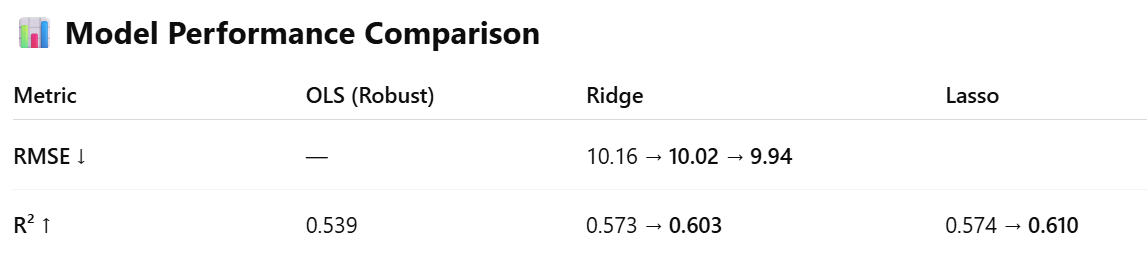